In [75]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import copy

[nltk_data] Error loading stopwords: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


In [95]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stemmer

In [77]:
# def stemWords(tokenizedWords):
# #     print("a")
    
#     for i in range(1, len(tokenizedWords) + 1):
#         # filteredWords=[word for word in tokenizedWords[i] if word not in stopwords.words('english')]
# #             print("ddd ",tokenizedWords[i])
#             print(len(tokenizedWords[i]))
#             filteredWords=[]
#             for word in tokenizedWords[i]:
#                 if word in stemmer.stem(word):
#                      filteredWords.append(stemmer.stem(word))
#             tokenizedWords[i] = filteredWords
# #             print(filteredWords)
#     return tokenizedWords
def stemWords(tokenizedWords):
    for i in range(1, len(tokenizedWords) + 1):
        # filteredWords=[word for word in tokenizedWords[i] if word not in stopwords.words('english')]
        for word in tokenizedWords[i]:
            print(filteredWords)
            filteredWords = [word for word in tokenizedWords[i] if word in stemmer.stem(word)]
            tokenizedWords[i] = filteredWords
    return tokenizedWords

In [78]:
df = pd.read_csv("yelp.csv")


In [79]:
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


### Coversion in lower case ###

In [80]:
df['text'] = df['text'].str.lower()

### Removal of stop words

In [81]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
# print(len(stop))
stop=stop[0:144]
# print(stop)

In [ ]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# df['text']=

### STEMMING

In [91]:
df['text']

0       wife took birthday breakfast excellent. weathe...
1       idea give bad place. show you, everyone. like ...
2                  love gyro plate. rice good also dig :)
3       rosie, dakota, love dog park!!! lot paths, des...
4       general scott petello good egg!!! go detail, l...
5       is, put, beautiful. full wooden give warmth fa...
6       drop drive here. ate go back next day more. fo...
7       luckily, didn't travel far make flight. this, ...
8       come hour! amazing, sake $3...great wait staff...
9       nobuo menu. much drink. start pork stout. go l...
10      oldish man store sweet be. sweeter ice cream. ...
11      sandwich shoppe. great hot oven butter one san...
12      time thing right bbq chicken pizza (not sure l...
13      good tattoo shop. clean space, work look thoug...
14      i'm 2 new phoenix. irish town found rosie's. d...
15      worth 21$ salad small pizza? not! bad service....
16      went saturday afternoon place empty. brunch on...
17      okay b

In [92]:
df['text'] = df['text'].apply(lambda x:' '.join([stemmer.stem(word) for word in x.split() if word in stemmer.stem(word)]))

In [93]:
df['text']

0       wife took birthday breakfast excellent. weathe...
1       idea give bad place. show you, everyone. like ...
2                  love gyro plate. rice good also dig :)
3       rosie, dakota, love dog park!!! lot paths, des...
4       general scott petello good egg!!! go detail, l...
5       is, put, beautiful. full wooden give warmth fa...
6       drop drive here. ate go back next day more. fo...
7       luckily, didn't travel far make flight. this, ...
8       come hour! amazing, sake $3...great wait staff...
9       nobuo menu. much drink. start pork stout. go l...
10      oldish man store sweet be. sweeter ice cream. ...
11      sandwich shoppe. great hot oven butter one san...
12      time thing right bbq chicken pizza (not sure l...
13      good tattoo shop. clean space, work look thoug...
14      i'm 2 new phoenix. irish town found rosie's. d...
15      worth 21$ salad small pizza? not! bad service....
16      went saturday afternoon place empty. brunch on...
17      okay b

In [96]:
token=copy.deepcopy(df['text'])

In [97]:
token

0       wife took birthday breakfast excellent. weathe...
1       idea give bad place. show you, everyone. like ...
2                  love gyro plate. rice good also dig :)
3       rosie, dakota, love dog park!!! lot paths, des...
4       general scott petello good egg!!! go detail, l...
5       is, put, beautiful. full wooden give warmth fa...
6       drop drive here. ate go back next day more. fo...
7       luckily, didn't travel far make flight. this, ...
8       come hour! amazing, sake $3...great wait staff...
9       nobuo menu. much drink. start pork stout. go l...
10      oldish man store sweet be. sweeter ice cream. ...
11      sandwich shoppe. great hot oven butter one san...
12      time thing right bbq chicken pizza (not sure l...
13      good tattoo shop. clean space, work look thoug...
14      i'm 2 new phoenix. irish town found rosie's. d...
15      worth 21$ salad small pizza? not! bad service....
16      went saturday afternoon place empty. brunch on...
17      okay b

In [85]:
df['text'] = stemWords(token)
# df

803
54
296
295
1436
1048
186
243
122
218
210
268
402
755
500
945
197
688
480
361
65
100
426
210
624
601
377
638
167
538
230
1114
208
395
829
746
85
208
303
441
373
81
104
447
177
135
307
111
2498
1308
155
618
467
770
3480
1244
343
152
527
293
386
566
414
344
201
276
147
87
379
287
605
423
1177
683
225
681
180
158
101
1423
648
1679
337
1762
180
699
391
235
390
368
265
311
206
248
40
209
38
308
1014
456
55
368
1011
99
601
366
335
131
936
168
376
765
970
202
835
358
215
134
402
166
812
186
1079
330
280
751
28
277
669
297
557
62
271
336
42
129
946
486
29
153
660
658
195
626
55
877
325
163
158
420
586
938
188
711
738
225
202
91
239
483
791
146
968
462
14
123
345
216
717
477
104
88
393
767
43
144
351
411
187
671
204
895
650
141
280
343
428
645
166
263
125
449
1443
222
244
937
498
1161
254
49
113
525
1238
157
729
171
285
287
235
251
402
505
230
161
47
1097
12
634
407
704
178
412
831
348
329
1006
221
584
148
1171
526
99
136
365
719
1427
385
527
417
47
319
150
333
132
164
528
188
523
261
390
91

241
177
131
292
346
547
56
355
452
46
502
668
1183
760
882
105
167
3236
817
485
179
179
180
500
472
43
332
826
879
775
474
524
229
736
416
621
322
562
345
139
1090
291
648
253
374
492
528
669
573
1290
207
540
21
167
264
120
1104
779
301
229
469
137
1262
259
423
678
282
141
195
507
145
189
540
132
580
223
37
304
245
159
290
126
417
319
201
222
528
480
71
576
235
341
2297
564
157
205
197
795
479
97
359
724
722
201
207
690
226
832
27
533
249
391
65
713
336
383
393
301
366
194
296
919
577
282
249
721
625
1435
700
423
246
721
1199
260
386
615
565
206
401
429
84
203
581
117
54
117
114
65
223
324
289
490
183
155
333
482
178
1416
651
486
122
338
1505
448
561
73
385
771
227
279
1501
379
581
219
390
772
426
467
582
916
23
158
176
588
565
573
334
308
1022
232
164
169
2304
2121
79
314
151
30
376
142
515
324
408
178
188
707
960
174
151
403
373
290
351
264
235
43
710
316
323
515
238
1099
648
546
580
375
303
157
693
64
412
470
189
384
1019
742
43
183
397
1181
382
217
143
592
330
696
369
151
248
158
8

88
11
420
101
682
453
1137
129
995
1038
782
1455
86
582
474
238
485
1260
252
519
258
1069
37
1095
81
1016
88
1327
147
267
322
186
329
40
172
81
248
378
177
381
3220
26
228
31
124
801
338
369
27
238
40
139
927
1332
269
289
271
641
845
730
184
99
171
671
1043
43
655
802
145
636
536
250
331
1112
262
324
1530
1548
229
568
367
176
238
337
207
77
145
152
232
1213
299
1124
282
666
198
478
61
439
329
322
443
244
108
38
386
95
235
276
442
124
880
1183
791
188
916
562
1115
189
343
179
997
203
143
287
474
219
369
494
274
54
471
97
335
403
380
1054
199
159
347
1083
186
245
79
458
50
298
157
392
216
48
1760
187
177
1179
434
1374
256
369
1494
1026
51
140
87
261
285
560
543
342
444
132
108
722
297
928
111
225
684
340
689
820
153
76
87
105
458
412
709
375
476
481
678
705
205
259
367
398
428
317
321
89
493
123
139
1316
924
77
286
526
412
952
223
903
376
505
215
272
314
140
88
108
301
107
392
226
210
431
492
642
102
165
26
570
481
378
82
180
212
103
545
426
103
250
376
170
538
1718
244
628
248
71
270
10

215
421
475
1587
496
98
402
200
511
29
595
2055
1767
253
92
209
159
474
943
527
227
428
855
442
575
229
887
389
179
1322
113
914
1316
420
654
147
442
403
471
157
1499
81
136
529
79
337
312
383
116
315
158
548
310
42
538
796
500
2167
559
378
505
11
354
571
139
390
47
477
486
354
574
62
749
92
1097
881
740
391
743
734
784
145
230
349
48
113
10
2
450
844
196
1845
352
573
468
1029
237
96
152
727
663
88
87
562
464
78
631
934
760
724
126
418
211
319
216
478
462
211
459
157
204
464
121
257
599
317
733
236
1168
580
1259
267
501
96
439
239
399
501
93
1596
274
393
504
260
73
548
130
135
449
226
411
475
389
434
491
292
542
977
491
324
825
165
237
523
30
240
283
231
480
622
220
279
575
569
191
408
1037
332
680
481
848
222
194
357
189
898
710
54
63
711
302
261
1546
176
53
67
692
817
661
331
491
67
178
472
326
99
304
140
529
142
82
181
804
432
1861
1043
200
161
693
124
386
176
856
532
1081
82
719
505
113
1700
541
977
258
1143
377
971
264
372
259
380
796
212
1014
437
277
274
264
917
499
562
555
285
1

313
73
1267
521
173
292
476
400
434
426
300
294
1100
112
269
413
392
226
445
749
501
327
304
421
659
227
427
668
893
390
678
960
640
21
474
352
764
697
239
294
680
400
179
500
253
553
180
462
78
164
276
691
312
264
147
265
859
1317
513
228
612
180
969
63
87
472
186
531
1226
804
914
266
639
200
379
890
169
914
449
792
205
262
43
555
708
96
477
226
857
409
727
907
381
726
57
328
163
286
229
209
522
595
316
237
602
76
1116
634
135
963
168
412
14
221
186
426
77
1130
250
497
1069
339
561
893
1013
746
614
2216
45
169
75
72
70
890
179
373
208
465
437
975
393
2471
45
439
1080
694
90
367
178
193
84
242
311
1502
275
325
196
2474
431
1090
1047
372
275
391
463
298
511
222
1577
536
406
1621
510
634
664
534
176
322
343
788
221
1161
52
309
542
147
306
564
32
206
302
492
519
915
823
405
347
755
43
126
233
77
938
801
709
536
253
341
213
412
131
410
58
960
449
128
545
272
564
58
70
119
193
337
730
114
622
80
258
441
1560
238
140
682
11
416
688
469
861
472
428
198
723
266
210
734
405
313
316
616
420
401


KeyError: 10000

In [ ]:
token1=df['text']
token1

In [86]:
texts = df['text']
# texts
stars = df['stars']
# stars

#### REASON FOR BALANCING CAN BE SEEN BY GRAPH SHOWING VARIATION IN COLLECTION OF RATING COUNT ###$

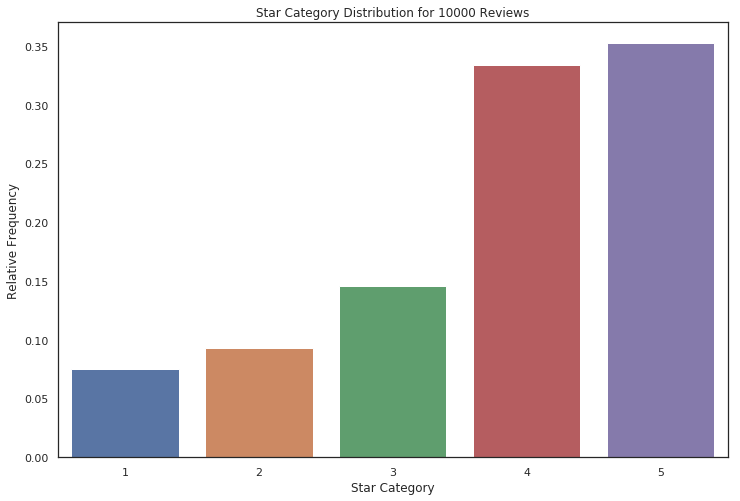

In [87]:
N_star_categories = 5
colors = np.array(['#660000', '#ff4d4d', '#ffb3b3', '#99e699', '#29a329'])
stars_labels = np.array(range(N_star_categories)) + 1;
#star_category_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(N_star_categories) 
star_category_absolute_frequencies = df.stars.value_counts(ascending=True);
star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))
sns.set()
sns.set(style="white")
fig2 = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=bar_plot_indices + 1, y=star_category_relative_frequencies)
ax.set_xlabel('Star Category');
ax.set_ylabel('Relative Frequency');
ax.set_title('Star Category Distribution for {0} Reviews'.format(len(df)));

we’ll get less biased predictions if we train the system on balanced data. This means that ideally we should have the same number of examples of each review type.

In [66]:
def balance_classes(xs, ys):
    
    freqs = Counter(ys)

    # the least common class is the maximum number we want for all classes
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i, y in enumerate(ys):
        if num_added[y] < max_allowable:
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] += 1
    return new_xs, new_ys

In [67]:
print(Counter(stars))
balanced_x, balanced_y = balance_classes(texts, stars)
print(Counter(balanced_y))

Counter({4: 3526, 5: 3337, 3: 1461, 2: 927, 1: 749})
Counter({5: 749, 4: 749, 2: 749, 3: 749, 1: 749})


### TF-IDF ###


In [68]:
#This vectorizer breaks text into single words and bi-grams and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,2))

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(balanced_x)

In [ ]:
# print(vectors)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(vectors, balanced_y, test_size=0.33, random_state=42)

### Linear SVC

In [70]:
# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [71]:
preds = classifier.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])

[1, 3, 3, 1, 2, 1, 1, 4, 5, 4]
[2, 4, 3, 4, 2, 1, 4, 4, 5, 3]


In [72]:
print(accuracy_score(y_test, preds))

0.5040453074433657


In [ ]:
confusion_matrix(y_test, preds)

### NN

In [ ]:
from sklearn.neural_network import MLPClassifier 
clf = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred2)*100)

In [ ]:
# print(preds)

In [ ]:
# import numpy as np
# from sklearn.naive_bayes import GaussianNB
# clf_pf = GaussianNB()
# clf_pf.partial_fit(X_train, y_train)
# GaussianNB(priors=None, var_smoothing=1e-09)
# print(clf_pf.predict(X_test))

### Logistic

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)
y_test1=clf.predict(X_test)


In [ ]:
y_test

In [ ]:
print(accuracy_score(y_test, y_test1)*100)

### NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train.toarray(),y_train)

In [ ]:
predicted= model.predict(X_test.toarray())

In [ ]:
print(accuracy_score(y_test, predicted)*100)